# Cointegration Example in time series

Example 3.1 from the book "Likelihood-Based-Inference-Cointegrated-Autoregressive-Econometrics"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [8]:
mu, sigma = 0, 1 # mean and standard deviation
n = 10000
s1 = np.random.normal(mu, sigma, n)
s2 = np.random.normal(mu, sigma, n)
s3 = np.random.normal(mu, sigma, n)

/Users/parce/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


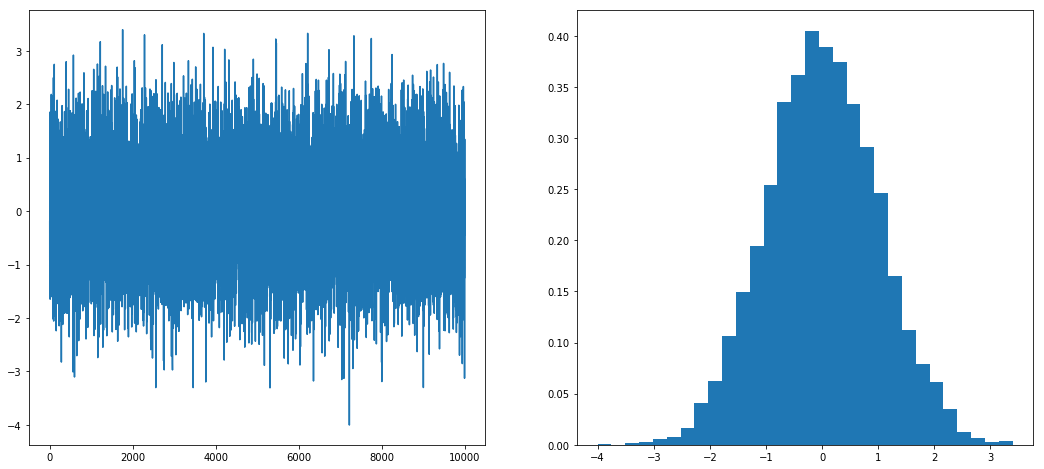

In [9]:
s = s1
plt.figure(1)
plt.subplot(121)
plt.plot(s)
plt.subplot(122)
plt.hist(s, 30, normed=True)
plt.show()

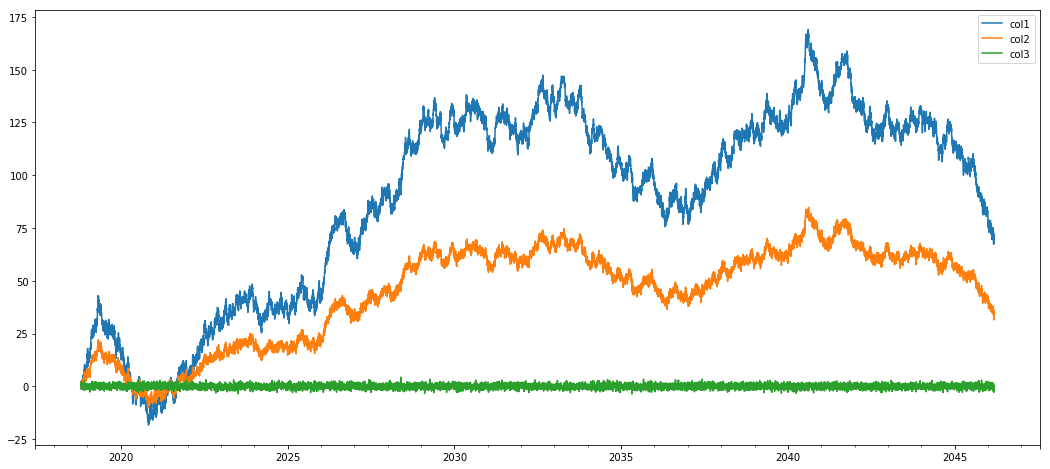

In [10]:
a = 0.5
x_1t = np.cumsum(s1)+s2
x_2t = a*np.cumsum(s1)+s3
x_3t = s3
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(10), periods=n, freq='D')
y = pd.DataFrame(index=index, data={'col1': x_1t, 'col2': x_2t, 'col3':x_3t} )
y.plot()

## Augmented Dickey Fuller test

In [11]:
def ADF(v, crit='5%', max_d=6, reg='nc', autolag='AIC'):
    """ Augmented Dickey Fuller test

    Parameters
    ----------
    v: ndarray matrix
        residuals matrix

    Returns
    -------
    bool: boolean
        true if v pass the test 
    """

    boolean = False

    
    adf = adfuller(v, max_d, reg, autolag)
    print adf
    if(adf[0] < adf[4][crit]):
        pass
    else:
        boolean = True

    return boolean

# Testing Unit root

In [12]:
print ADF(x_1t)   # unit root hypothesis can't be rejected
print ADF(np.diff(x_1t))
print ADF(x_2t)   # unit root hypothesis can't be rejected
print ADF(np.diff(x_2t))
print ADF(x_3t)   # unit root hypothesis is rejected at the 95 per cent level  -> I(0)

(-0.23962125130354625, 0.5991099128201325, 4, 9995, {'5%': -1.9410269070891237, '1%': -2.5659637281522203, '10%': -1.616793453855115}, 37946.65027286696)
True
(-59.54155885780457, 0.0, 3, 9995, {'5%': -1.9410269070891237, '1%': -2.5659637281522203, '10%': -1.616793453855115}, 37941.69118115047)
False
(-0.2742947693653647, 0.5859463925187636, 6, 9993, {'5%': -1.9410269124810415, '1%': -2.5659637729364624, '10%': -1.616793448547595}, 33228.57440813983)
True
(-54.61893871337582, 0.0, 5, 9993, {'5%': -1.9410269124810415, '1%': -2.5659637729364624, '10%': -1.616793448547595}, 33224.27649896928)
False
(-49.742541122452316, 0.0, 3, 9996, {'5%': -1.941026904393975, '1%': -2.5659637057668205, '10%': -1.6167934565080793}, 28315.50221985501)
False


## Johansen function

In [13]:
def get_johansen(y, p):
        """
        Get the cointegration vectors at 95% level of significance
        given by the trace statistic test.
        """

        N, l = y.shape
        jres = coint_johansen(y, 0, p)
        trstat = jres.lr1                       # trace statistic
        tsignf = jres.cvt                       # critical values

        for i in range(l):
            if trstat[i] > tsignf[i, 1]:     # 0: 90%  1:95% 2: 99%
                r = i + 1
        jres.r = r
        jres.evecr = jres.evec[:, :r]

        return jres

In [14]:
p=1
jres=get_johansen(y,p)
print "There are ", jres.r, "cointegration vectors"
v1=jres.evecr[:,0]
v2=jres.evecr[:,1]
print v1
print v2
v3=jres.evec[:,2]  # v3 is not a cointegration vector

There are  3 cointegration vectors
[ 1.05728147 -2.11412953  3.05472586]
[-0.9335791   1.86770899 -0.80576579]


Even though we were expecting [0.5 -1 0] y [0 0 1] these vectors are in the same vector space. If we divide every vector by their second component we will get some similar results.

In [15]:
v1/-v1[1]

array([ 0.5001025, -1.       ,  1.4449095])

In [16]:
v2/-v2[1]

array([ 0.49985255, -1.        ,  0.43141935])

/Users/parce/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


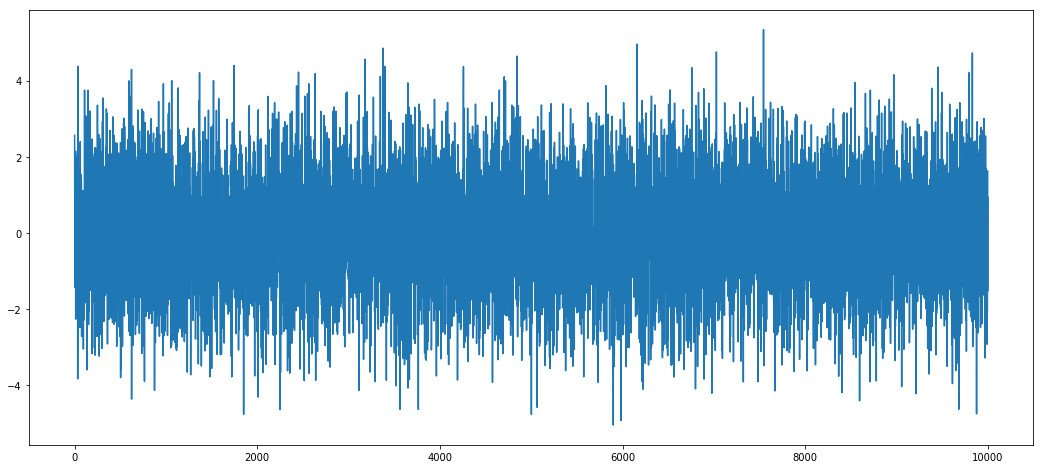

In [17]:
# If we apply vector v1 we get a I(0) time series
plot(np.dot(y.as_matrix(),v1))

/Users/parce/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


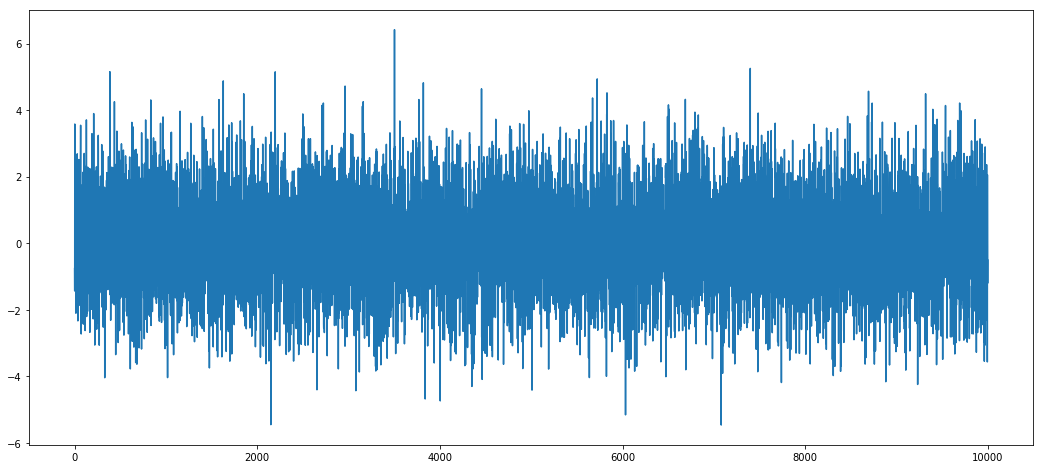

In [18]:
# If we apply vector v2 we get a I(0) time series
plot(np.dot(y.as_matrix(),v2))

/Users/parce/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


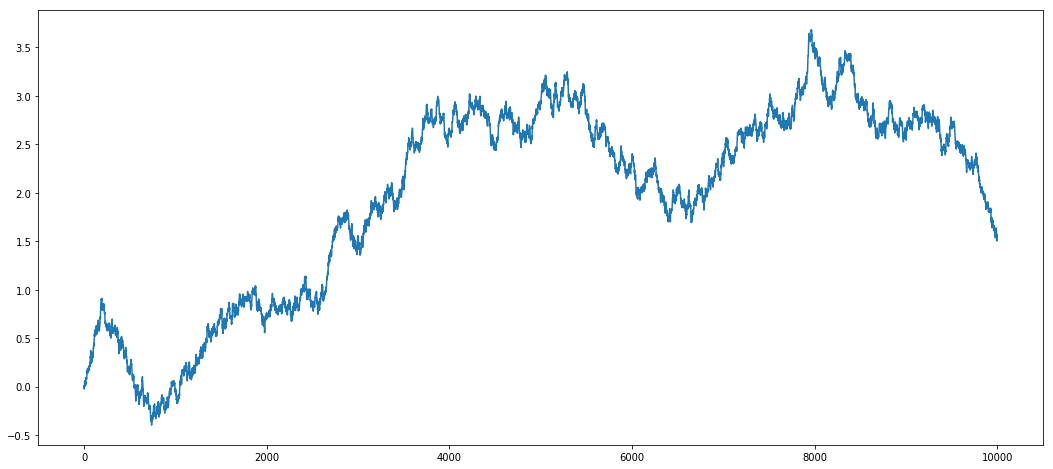

In [19]:
# If we apply vector v3 we won't get a I(0) time series since it's not a cointegration vector.
plot(np.dot(y.as_matrix(),v3))